In [1]:
import pdfplumber
import pandas as pd

In [2]:
import logging
logging.propagate = False 
logging.getLogger().setLevel(logging.ERROR)

## Pdfplumber

In [ ]:
table_Settings={
    'vertical_strategy':'text',
    'join_x_tolerance':,
    
}

In [ ]:
from collections import defaultdict
final_table=defaultdict(list)
with pdfplumber.open('adani_q1fy26_results.pdf') as pdf:
    for i,page in enumerate(pdf.pages):
        # print("page: ",i+1)
        tables=page.extract_tables()
        
        # print(tables)
        if len(tables)>0:
        #     print(tables)
            for table in tables:
                columns=[]
                empty_col=1
                for column in table[0]:
                    if column!=None and len(column)>0:
                        columns.append(column)
                    else:
                        columns.append(f'empty_col_{empty_col}')
                        empty_col+=1
                # print(columns)
                if len(columns)>0:
                    final_table[i+1].append(pd.DataFrame(columns=columns,data=table[1:]))
        # print(final_table)
        # print(tables)

In [3]:
pdf=pdfplumber.open('adani_q1fy26_results.pdf')

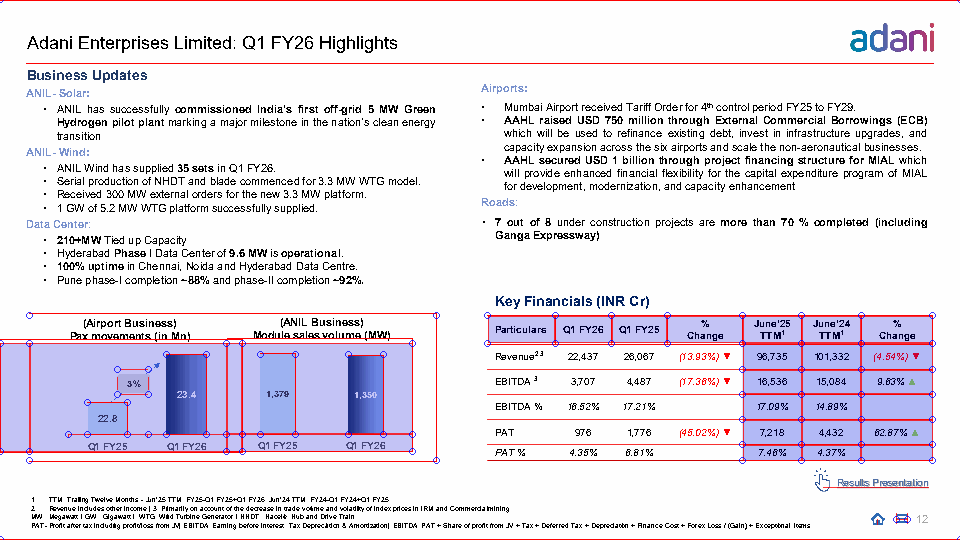

In [179]:
page=pdf.pages[11].to_image()
table_Settings={
    "vertical_strategy": "lines",
        "horizontal_strategy": "lines",
        "snap_tolerance": 6,
        "join_tolerance": 15,
        "intersection_tolerance": 8,
        # "edge_min_length": 4,
        "text_tolerance": 1,


    
}
page.reset().debug_tablefinder(table_Settings)

In [168]:
pdf.pages[11].extract_tables(resolution=700)[1]

TypeError: Page.extract_tables() got an unexpected keyword argument 'resolution'

In [134]:
len(final_table)

29

In [135]:
final_table.keys()

dict_keys([2, 4, 5, 6, 7, 8, 10, 12, 13, 14, 16, 17, 18, 20, 21, 22, 24, 25, 26, 28, 29, 30, 32, 33, 34, 36, 37, 38, 41])

In [141]:
final_table[5][0]

,Utility,empty_col_1,empty_col_2,empty_col_3,empty_col_4,empty_col_5,11,",895",empty_col_6,"11,638",2.21%,▲,empty_col_7,"43,633","41,722",4.58%,▲,48.17%
0,Transport,,,,,,5,",949",,"5,265",12.99%,▲,None,"21,154","18,405",14.94%,▲,23.36%
1,AEL - Infrastr,uc,tu,re Busin,esses,,2,",825",,"2,691",4.98%,▲,None,"10,219","7,318",39.64%,▲,11.28%
2,A. Sub-total (,Inf,ra,structure,),,20,",669",,"19,594",5.49%,▲,None,"75,006","67,445",11.21%,▲,82.81%
3,B. Adjacencie,s,(C,ement),,,2,",242",,"1,638",36.87%,▲,None,"9,249","7,291",26.86%,▲,10.22%
4,Sub-total (In,fra,+,Adjacenc,ies),,22,",911",,"21,232",7.91%,▲,None,"84,255","74,736",12.74%,▲,93.03%
5,C. AEL- Exist,in,g B,usiness,es,,,882,,"1,796",(50.89%)2,▼,None,"6,317","7,766",(18.66%)2,▼,6.97%
6,Portfolio EBI,TD,A (,A+B+C),,,23,",793",,"23,028",3.32%,▲,None,"90,572","82,502",9.78%,▲,100%
7,,,,,ve,,,,,422,,,None,"2,417","3,247",,,
8,APL prior per\n(provision) in,io\nclu,d i\nde,ncome/\nd in abo,None,,,406,,None,None,None,None,None,None,None,None,None
9,,,,,None,,,,,None,None,None,None,None,None,None,None,None


In [58]:
valid_tables=defaultdict(list)
for page,tables in final_table.items():
    for table in tables:
        is_valid=False
        if len(table)<2:
            continue
        else:
            is_valid=True
        for column in table.columns:
            if "empty_col" in column:
                is_valid=False
                continue
            else:
                is_valid=True
        
        if is_valid:
            valid_tables[page].append(table)

        

In [59]:
len(valid_tables)

17

In [60]:
valid_tables.keys()

dict_keys([5, 7, 8, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38])

In [66]:
valid_tables[16][2]

,"2,140"
0,"1,401"
1,"7,393"


## Tabula

In [68]:
import tabula
tabula_tables=tabula.read_pdf("adani_q1fy26_results.pdf", pages='all',encoding="cp1252")

In [70]:
len(tabula_tables)

65

In [85]:
tabula_tables[25]

,"FY25FY24\rEBITDA (INR Cr)\r7,7476,323\rEBITDA (USD bn)\r0.910.76\rCAT (FFO) (INR Cr)\r5,1793,824\rCAT (FFO) (USD bn)\r0.610.46\r1 Year EBITDA6 Year EBITDA\rGrowth RateCAGR\r22.53%16.40%",Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,FY25,FY24,NaN
1,EBITDA (INR Cr),"7,747","6,323",NaN
2,EBITDA (USD bn),0.91,0.76,NaN
3,CAT (FFO) (INR Cr),"5,179","3,824",NaN
4,CAT (FFO) (USD bn),0.61,0.46,NaN
5,NaN,NaN,NaN,NaN
6,NaN,1 Year EBITDA\rGrowth Rate,NaN,6 Year EBITDA\rCAGR
7,22.53%,16.40%,NaN,NaN


## Camelot

In [86]:
import camelot

d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\pypdf\_crypt_providers\_cryptography.py:32: CryptographyDeprecationWarning: ARC4 has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.ARC4 and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  from cryptography.hazmat.primitives.ciphers.algorithms import AES, ARC4


In [181]:
tables = camelot.read_pdf('adani_q1fy26_results.pdf',pages='all',flavor='stream')

d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (0, 0, 960.0, 540.0)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)
d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (0, 0, 960.0, 540.0)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)
d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (0, 0, 960.0, 540.0)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)
d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (0, 0, 960.0, 540.0)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)
d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table 

In [182]:
len(tables)

54

In [196]:
tables[13].df

,0,1,2,3,4,5,6,7,8,9,10
0,"100% uptime in Chennai, Noida and Hyderabad Da...",,,,,,,,,,
1,Pune phase-I completion ~88% and phase-II comp...,,,,,,,,,,
2,,,,,,Key Financials (INR Cr),,,,,
3,(Airport Business),,(ANIL Business),,,,,%,June’25,June’24,%
4,,,,,Particulars,Q1 FY26,Q1 FY25,,,,
5,Pax movements (in Mn),,Module sales volume (MW),,,,,Change,TTM1,TTM1,Change
6,(Airport Business),,(ANIL Business),,,,,,,,
7,,,Module sales volume (MW),,Revenue2.3,"22,437","26,067",(13.93%) ▼,"96,735","101,332",(4.54%) ▼
8,Pax movements (in Mn),,,,,,,,,,
9,3%,,,,EBITDA 3,"3,707","4,487",(17.36%) ▼,"16,536","15,084",9.63% ▲


## Table Transformer (TaTr)

In [3]:
from transformers import AutoImageProcessor, TableTransformerForObjectDetection

d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
image_processor = AutoImageProcessor.from_pretrained("microsoft/table-transformer-detection")
model = TableTransformerForObjectDetection.from_pretrained("microsoft/table-transformer-detection")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
Some weights of the model checkpoint at microsoft/table-transformer-detection were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initi

In [17]:
page=pdf.pages[1].to_image().original

In [7]:
# import numpy as np
# np.array(page)

In [18]:
inputs = image_processor(images=page, return_tensors="pt")
outputs = model(**inputs)

In [19]:
# outputs
import torch
target_sizes = torch.tensor([page.size[::-1]])
results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[
    0
]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )

Detected table with confidence 0.996 at location [424.96, 231.91, 802.06, 459.55]


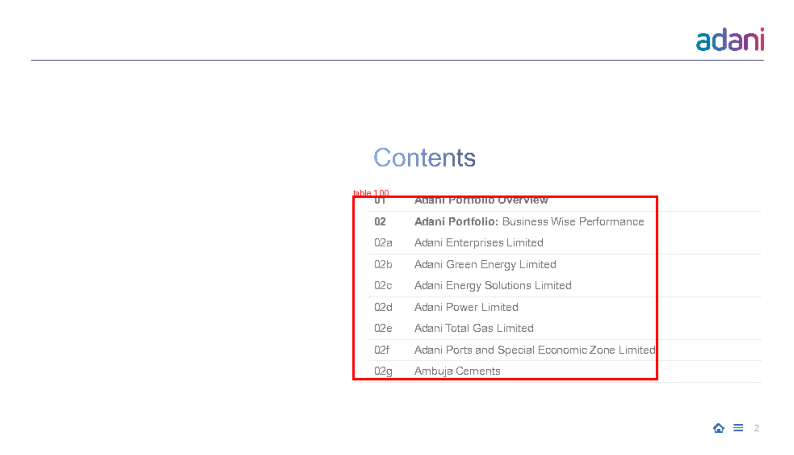

In [20]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
draw = ImageDraw.Draw(page)

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    draw.rectangle(box, outline="red", width=3)
    draw.text((box[0], box[1]-10), f"{model.config.id2label[label.item()]} {score:.2f}", fill="red")

# 6️⃣ Show the image
plt.figure(figsize=(10, 10))
plt.imshow(page)
plt.axis("off")
plt.show()

In [30]:
pdf.pages[11].height

540

In [21]:
for i, box in enumerate(results["boxes"]):
    x0, y0, x1, y1 = box.tolist()

    # ⚠️ Important: pdfplumber uses PDF coordinate system (origin = bottom-left)
    # PIL images use origin at top-left → we must flip Y coordinates
    page_height = float(pdf.pages[1].height)
    bbox_pdf = (x0-10,   y0-10, x1+10,  y1+10)

    # Crop region
    cropped_page = pdf.pages[1].within_bbox(bbox_pdf)

    # Extract the table using pdfplumber
    table = cropped_page.extract_table()

    print(f"\n--- Table {i+1} ---")
    if table:
        for row in table:
            print(row)
    else:
        print("No structured table detected, maybe text-only region.")


--- Table 1 ---
No structured table detected, maybe text-only region.


In [26]:
import camelot
for i, box in enumerate(results["boxes"]):
    x0, y0, x1, y1 = box.tolist()
    # for i, area in enumerate():
    print(f"{x0-10},{page_height-y0-10},{x1+10},{page_height-y1+10}")
    tables = camelot.read_pdf("adani_q1fy26_results.pdf", pages="2",flavor='stream',row_tol=8,table_areas=[f"{x0-10},{page_height-y0-10},{x1+10},{page_height-y1+10}"])
    # print(f"\n--- Table {i+1} ---")
    if len(tables) > 0:
        print(tables[0].df)

414.9649658203125,298.09288024902344,812.0611572265625,90.44534301757812
     0                                              1
0   02     Adani Portfolio: Business Wise Performance
1  02a                      Adani Enterprises Limited
2  02b                     Adani Green Energy Limited
3  02c                 Adani Energy Solutions Limited
4  02d                            Adani Power Limited
5  02e                        Adani Total Gas Limited
6  02f  Adani Ports and Special Economic Zone Limited
7  02g                                 Ambuja Cements


In [152]:
tables[0].df

,0,1
0,Entity,Rating
1,AGEL RG2,BBB- (Fitch) / Ba1 (Moody's)/ BB+ (S&P)


In [154]:
import tabula
for i, box in enumerate(results["boxes"]):
    x0, y0, x1, y1 = box.tolist()
    dfs = tabula.read_pdf(
        "adani_q1fy26_results.pdf",
        pages=17,
        area=[y0-10,x0-10,y1+10,x1+10],       # 👈 coordinates in points
        # multiple_tables=False,
        # lattice=True     # or stream=True depending on the table type,
        encoding="cp1252",
        stream=True
    )
    print(dfs[0])

                Entity          Rating Agency         Rating
0  AGEL (Consolidated)          India Ratings    AA-/ Stable
1             AGEL RG1  CRISIL/ India Ratings  AA+/ Positive
2                  NaN        CAREEDGE/ ICRA/            NaN
3       AGEL Hybrid RG                    NaN    AA+/ Stable
4                  NaN          India Ratings            NaN
                              International Ratings
0                                     Entity Rating
1  AGEL RG2 BBB- (Fitch) / Ba1 (Moody's)/ BB+ (S&P)
2              AGEL RG1 BBB- (Fitch)/ Ba1 (Moody’s)


In [155]:
dfs[0]

,International Ratings
0,Entity Rating
1,AGEL RG2 BBB- (Fitch) / Ba1 (Moody's)/ BB+ (S&P)
2,AGEL RG1 BBB- (Fitch)/ Ba1 (Moody’s)


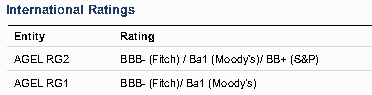

In [156]:
cropped_page.to_image()

## Extract Tables

In [14]:
import torch
from PIL import ImageDraw
import matplotlib.pyplot as plt
import camelot
import tabula

d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\pypdf\_crypt_providers\_cryptography.py:32: CryptographyDeprecationWarning: ARC4 has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.ARC4 and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  from cryptography.hazmat.primitives.ciphers.algorithms import AES, ARC4


In [27]:
pdf_path="adani_q1fy26_results.pdf"
pdf=pdfplumber.open(pdf_path)

In [ ]:
from collections import defaultdict
pdfplumber_tables=defaultdict(list)
camelot_tables=defaultdict(list)
tabula_tables=defaultdict(list)

for j,page in enumerate(pdf.pages):
    print(j+1)
    page_height = float(page.height)
    page_img=page.to_image().original
    inputs = image_processor(images=page_img, return_tensors="pt")
    outputs = model(**inputs)
    target_sizes = torch.tensor([page_img.size[::-1]])
    results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[0]

    # draw = ImageDraw.Draw(page_img)

    # for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    #     box = [round(i, 2) for i in box.tolist()]
    #     draw.rectangle(box, outline="red", width=3)
    #     draw.text((box[0], box[1]-10), f"{model.config.id2label[label.item()]} {score:.2f}", fill="red")

    # # 6️⃣ Show the image
    # plt.figure(figsize=(10, 10))
    # plt.imshow(page_img)
    # plt.axis("off")
    # plt.show()

    #iterating over all the tables detected
    for i, box in enumerate(results["boxes"]):
        # print(box)
        x0, y0, x1, y1 = box.tolist()

        #pdfplumber
        bbox_pdf = (x0-10,   y0-10, x1+10,  y1+10)

        # Crop region
        cropped_page = page.within_bbox(bbox_pdf)

        # Extract the table using pdfplumber
        table = cropped_page.extract_table()
        # print(table)
        columns=[]
        empty_col=1
        if table:
            for column in table[0]:
                if column!=None and len(column)>0:
                    columns.append(column)
                else:
                    columns.append(f'{empty_col}')
                    empty_col+=1
            # print(columns)
            if len(columns)>0:
                # print(pd.DataFrame(columns=columns,data=table[1:]))
                pdfplumber_tables[j+1].append(pd.DataFrame(columns=columns,data=table[1:]))
        print("pdfplumber done")

        #camelot
        # print(f"{x0-10},{page_height-y0-10},{x1+10},{page_height-y1+10}")

        camelot_table = camelot.read_pdf(pdf_path, pages=f"{j+1}",flavor='stream',row_tol=8,table_areas=[f"{x0-10},{page_height-y0-10},{x1+10},{page_height-y1+10}"])
        

        if len(camelot_table) > 0:
            camelot_tables[j+1].append(camelot_table[0].df)
        
        print("camelot done")

        #tabula
        tabula_table = tabula.read_pdf(
            pdf_path,
            pages=j+1,
            area=[y0-10,x0-10,y1+10,x1+10],       #coordinates in points
            encoding="cp1252",
            stream=True
        )
        tabula_tables[j+1].extend(tabula_table)
        print("tabula done")
        


1
2
pdfplumber done
camelot done
tabula done
3
4
5
pdfplumber done
camelot done
tabula done
6
7
8
pdfplumber done
camelot done
tabula done
9
10
11
12
pdfplumber done
camelot done
tabula done
13
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
14
pdfplumber done
camelot done
tabula done
15
16
pdfplumber done
camelot done
tabula done
17
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
18
pdfplumber done
camelot done
tabula done
19
20
pdfplumber done
camelot done
tabula done
21
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
22
pdfplumber done
camelot done
tabula done
23
24
pdfplumber done
camelot done
tabula done
25
pdfplumber done
camelot done
tabula done
26
pdfplumber done
camelot done
tabula done
27
28
pdfplumber done
camelot done
tabula done
29
30
pdfplumber done
camelot done
tabula done
31
32
pdfplumber done
camelot done
tabula done
33
pdfplumb

In [49]:
len(pdfplumber_tables),len(camelot_tables),len(tabula_tables)

(20, 23, 23)

In [50]:
pdfplumber_tables.keys()

dict_keys([5, 8, 12, 14, 16, 17, 18, 20, 21, 22, 24, 25, 26, 28, 30, 32, 34, 36, 38, 41])

In [68]:
pdfplumber_tables[8][0].columns.tolist()

['EBITDA (INR Cr)1', '89,806']

In [51]:
camelot_tables.keys()

dict_keys([2, 5, 8, 12, 13, 14, 16, 17, 18, 20, 21, 22, 24, 25, 26, 28, 30, 32, 33, 34, 36, 38, 41])

In [67]:
camelot_tables[8][0].columns.tolist()

[0, 1, 2]

In [52]:
tabula_tables.keys()

dict_keys([2, 5, 8, 12, 13, 14, 16, 17, 18, 20, 21, 22, 24, 25, 26, 28, 30, 32, 33, 34, 36, 38, 41])

In [70]:
tabula_tables[8][0].columns.to_list()

['Unnamed: 0', 'FY25', 'FY24']

1. max column names (no numbers)
2. least number of empty cells
3. combination of columns and most cell data

## Preprocessing

In [71]:
def number_of_correct_cols(table):
    cols=table.columns.tolist()
    nums=0
    for col in cols:
        if type(col)==str:
            nums+=1
    
    return nums


In [74]:
number_of_correct_cols(pdfplumber_tables[5][0]),number_of_correct_cols(camelot_tables[5][0])

(5, 0)